In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')     ## Importing Libraries

In [4]:
df = pd.read_csv('/content/mushroom.csv')   # Loading Dataset

In [5]:
df

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [6]:
# Drop unnamed index as it is unnecessary
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [7]:
df.head()     # Looking at the dataset
#Classification of the mushroom as edible or poisonous is needed.
#Hence target column is 'class'.

cap_shape cap_surface cap_color bruises   odor gill_attachment gill_spacing  \
0    sunken       scaly     white      no  anise      descending      distant   
1    sunken     fibrous       red      no  anise         notched      crowded   
2      flat     grooves    purple     yes   foul      descending      crowded   
3      bell       scaly      pink     yes  fishy         notched        close   
4      flat      smooth    yellow     yes  musty            free      crowded   

  gill_size gill_color stalk_shape  ...  veil_type veil_color ring_number  \
0     broad       pink    tapering  ...    partial      brown         two   
1    narrow  chocolate   enlarging  ...  universal      brown         two   
2     broad     purple    tapering  ...  universal     yellow         two   
3     broad     orange   enlarging  ...    partial     yellow         two   
4    narrow     orange   enlarging  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 25 columns]

In [8]:
df.info()   # 3 numerical columns and 23 object columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [9]:
df.describe(include='all')

cap_shape cap_surface cap_color bruises  odor gill_attachment  \
count       2000        2000      2000    2000  2000            2000   
unique         5           4         9       2     9               4   
top       sunken       scaly     brown     yes  foul            free   
freq         439         568       263    1023   274             540   
mean         NaN         NaN       NaN     NaN   NaN             NaN   
std          NaN         NaN       NaN     NaN   NaN             NaN   
min          NaN         NaN       NaN     NaN   NaN             NaN   
25%          NaN         NaN       NaN     NaN   NaN             NaN   
50%          NaN         NaN       NaN     NaN   NaN             NaN   
75%          NaN         NaN       NaN     NaN   NaN             NaN   
max          NaN         NaN       NaN     NaN   NaN             NaN   

       gill_spacing gill_size gill_color stalk_shape  ...  veil_type  \
count          2000      2000       2000        2000  ...       2000   
unique            3         2         12           2  ...          2   
top         distant    narrow     orange   enlarging  ...  universal   
freq            677      1007        216        1040  ...       1010   
mean            NaN       NaN        NaN         NaN  ...        NaN   
std             NaN       NaN        NaN         NaN  ...        NaN   
min             NaN       NaN        NaN         NaN  ...        NaN   
25%             NaN       NaN        NaN         NaN  ...        NaN   
50%             NaN       NaN        NaN         NaN  ...        NaN   
75%             NaN       NaN        NaN         NaN  ...        NaN   
max             NaN       NaN        NaN         NaN  ...        NaN   

       veil_color ring_number  ring_type spore_print_color population habitat  \
count        2000        2000       2000              2000       2000    2000   
unique          4           3          8                 9          6       7   
top         white         one  sheathing             brown   abundant   urban   
freq          553         689        305               255        360     316   
mean          NaN         NaN        NaN               NaN        NaN     NaN   
std           NaN         NaN        NaN               NaN        NaN     NaN   
min           NaN         NaN        NaN               NaN        NaN     NaN   
25%           NaN         NaN        NaN               NaN        NaN     NaN   
50%           NaN         NaN        NaN               NaN        NaN     NaN   
75%           NaN         NaN        NaN               NaN        NaN     NaN   
max           NaN         NaN        NaN               NaN        NaN     NaN   

            class stalk_height cap_diameter  
count        2000  2000.000000  2000.000000  
unique          2          NaN          NaN  
top     poisonous          NaN          NaN  
freq         1400          NaN          NaN  
mean          NaN     8.449118    12.314345  
std           NaN     3.697217     7.048845  
min           NaN     2.000000     1.000000  
25%           NaN     5.291009     5.723521  
50%           NaN     8.318596    12.124902  
75%           NaN    11.781272    18.698605  
max           NaN    15.095066    25.000054  

[11 rows x 25 columns]

In [10]:
df['class'].value_counts()

class
poisonous    1400
edible        600
Name: count, dtype: int64

In [11]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1024


In [12]:
exact_duplicates=df[df.duplicated()]

In [13]:
exact_duplicates

cap_shape cap_surface cap_color bruises     odor gill_attachment  \
34        bell      smooth      pink      no     foul         notched   
70      sunken       scaly    yellow      no  pungent      descending   
76     conical     grooves     brown      no     foul            free   
109     sunken      smooth     white      no    anise        attached   
127     sunken       scaly     white      no    anise      descending   
...        ...         ...       ...     ...      ...             ...   
1993      flat     grooves     green     yes    musty         notched   
1994      flat       scaly      pink      no    spicy        attached   
1995    sunken       scaly     brown     yes     foul        attached   
1997    convex     grooves     green     yes    fishy         notched   
1998      bell      smooth     white      no  pungent            free   

     gill_spacing gill_size gill_color stalk_shape  ...  veil_type veil_color  \
34        distant     broad       pink   enlarging  ...  universal      brown   
70        distant    narrow     orange   enlarging  ...    partial      white   
76        distant     broad      white    tapering  ...    partial     yellow   
109       crowded     broad      black    tapering  ...    partial      brown   
127       distant     broad       pink    tapering  ...    partial      brown   
...           ...       ...        ...         ...  ...        ...        ...   
1993      crowded     broad  chocolate   enlarging  ...  universal     yellow   
1994      distant    narrow        red   enlarging  ...  universal      brown   
1995      crowded    narrow  chocolate    tapering  ...    partial     orange   
1997        close    narrow       pink    tapering  ...    partial      brown   
1998        close    narrow     orange   enlarging  ...  universal     yellow   

     ring_number   ring_type spore_print_color population  habitat      class  \
34           one        zone             black  scattered   leaves  poisonous   
70          none        zone             white   numerous   leaves  poisonous   
76           two       large         chocolate   solitary    woods  poisonous   
109          two   sheathing             black   solitary    woods     edible   
127          two   sheathing         chocolate  clustered    waste  poisonous   
...          ...         ...               ...        ...      ...        ...   
1993         one        zone             brown   abundant  meadows  poisonous   
1994         two        zone             brown   abundant  meadows  poisonous   
1995         one     flaring            purple   abundant   leaves  poisonous   
1997         two  evanescent            yellow   abundant    woods  poisonous   
1998         one    cobwebby             brown   solitary    woods  poisonous   

     stalk_height cap_diameter  
34       5.291009     5.436304  
70       4.746453    10.769935  
76      12.206952     5.061715  
109     13.214007    14.549171  
127     14.276173     5.054983  
...           ...          ...  
1993    14.834383     2.053744  
1994     4.794826     4.576464  
1995     5.877891    17.464145  
1997    13.558064    11.270020  
1998    11.092703     8.423199  

[1024 rows x 25 columns]

In [14]:
# Drop duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (976, 25)


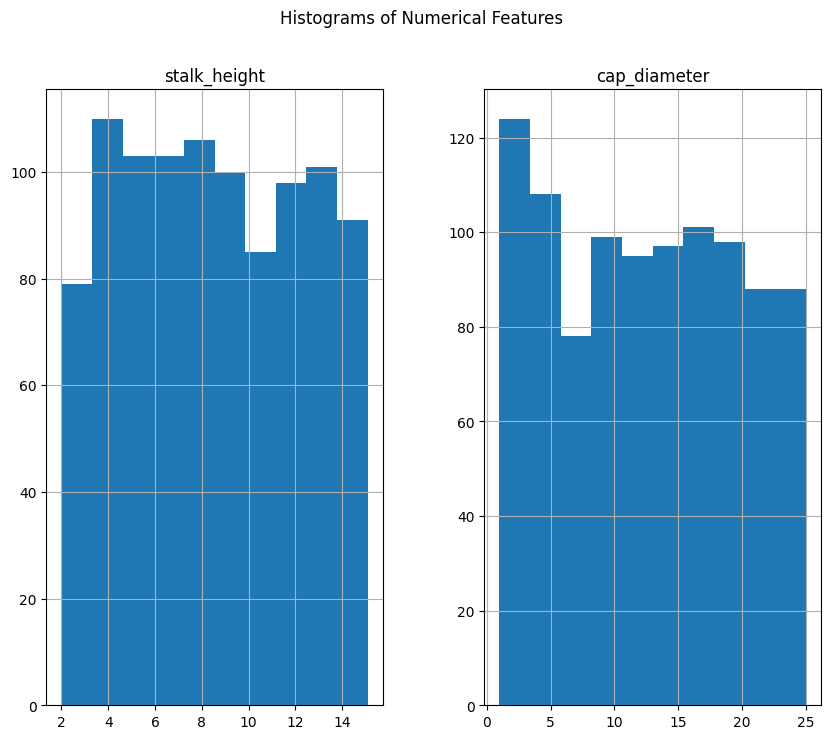

In [15]:
# Histograms for numerical features
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

Text(0.5, 1.0, 'Count of edible and poisonous mushrooms')

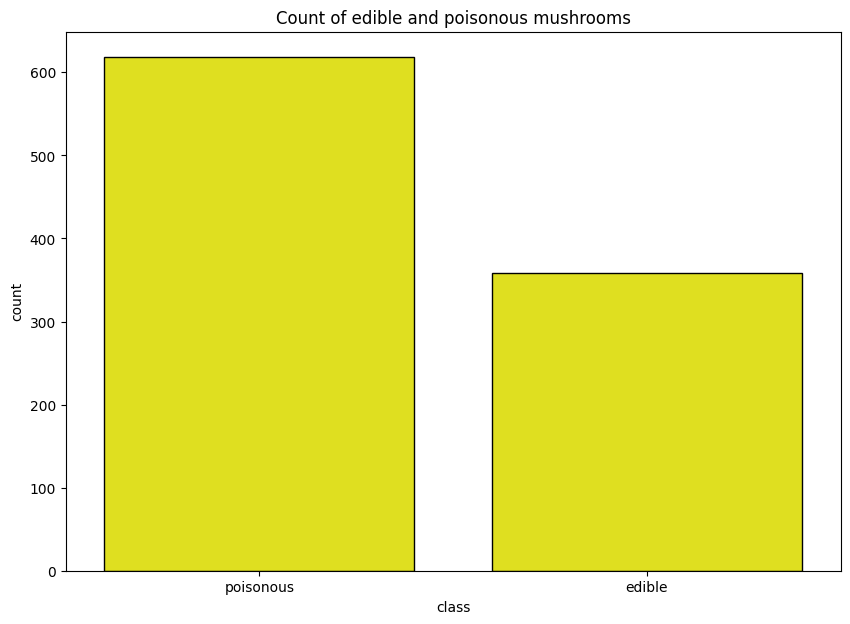

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['class'],color='yellow',edgecolor='black')
plt.title('Count of edible and poisonous mushrooms')

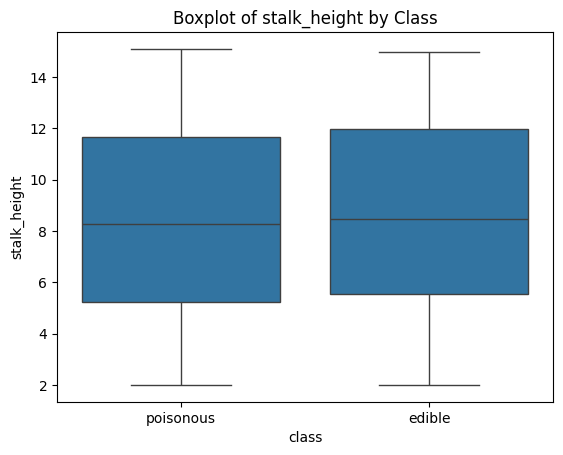

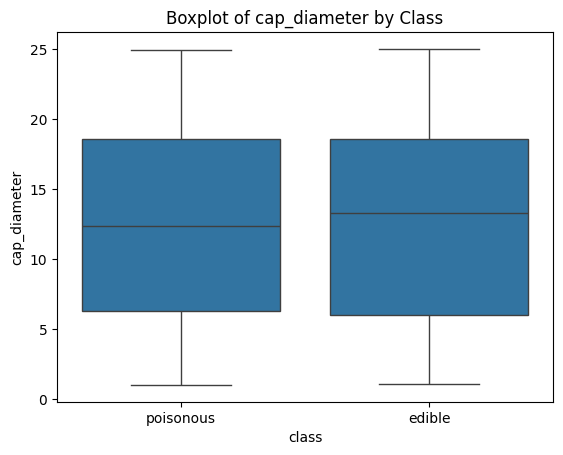

In [17]:
# Box plots for numerical features
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()

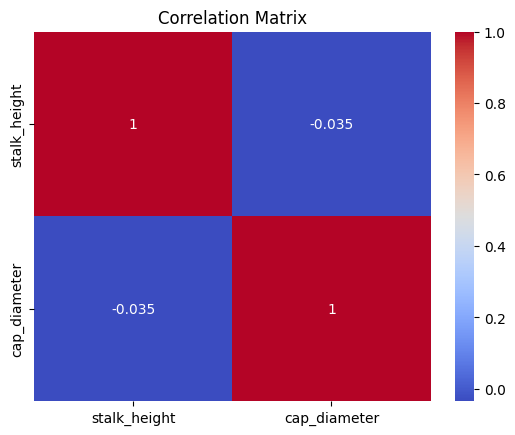

In [18]:
# Feature correlations (numerical)
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


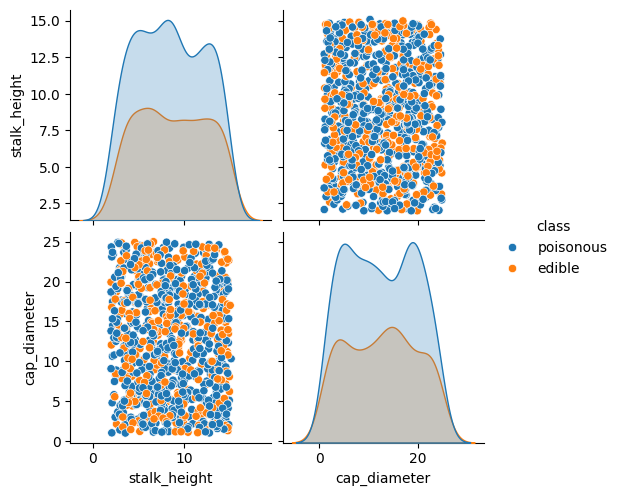

In [19]:
sns.pairplot(df,hue='class')


In [20]:
# Task 2: Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [22]:
df_encoded.head()

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  veil_type  \
0             2          0           7            1  ...          0   
1             1          1           3            0  ...          1   
2             1          0           8            1  ...          1   
3             0          0           6            0  ...          0   
4             1          1           6            0  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3           1        5   
1           0            2          6                  1           2        5   
2           3            2          6                  6           0        5   
3           3            2          0                  4           1        0   
4           2            0          4                  8           1        4   

   class  stalk_height  cap_diameter  
0      1     14.276173      5.054983  
1      0      3.952715     19.068319  
2      1      9.054265      7.205884  
3      1      5.226499     20.932692  
4      1     14.037532     12.545245  

[5 rows x 25 columns]

In [23]:
# Split dataset
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

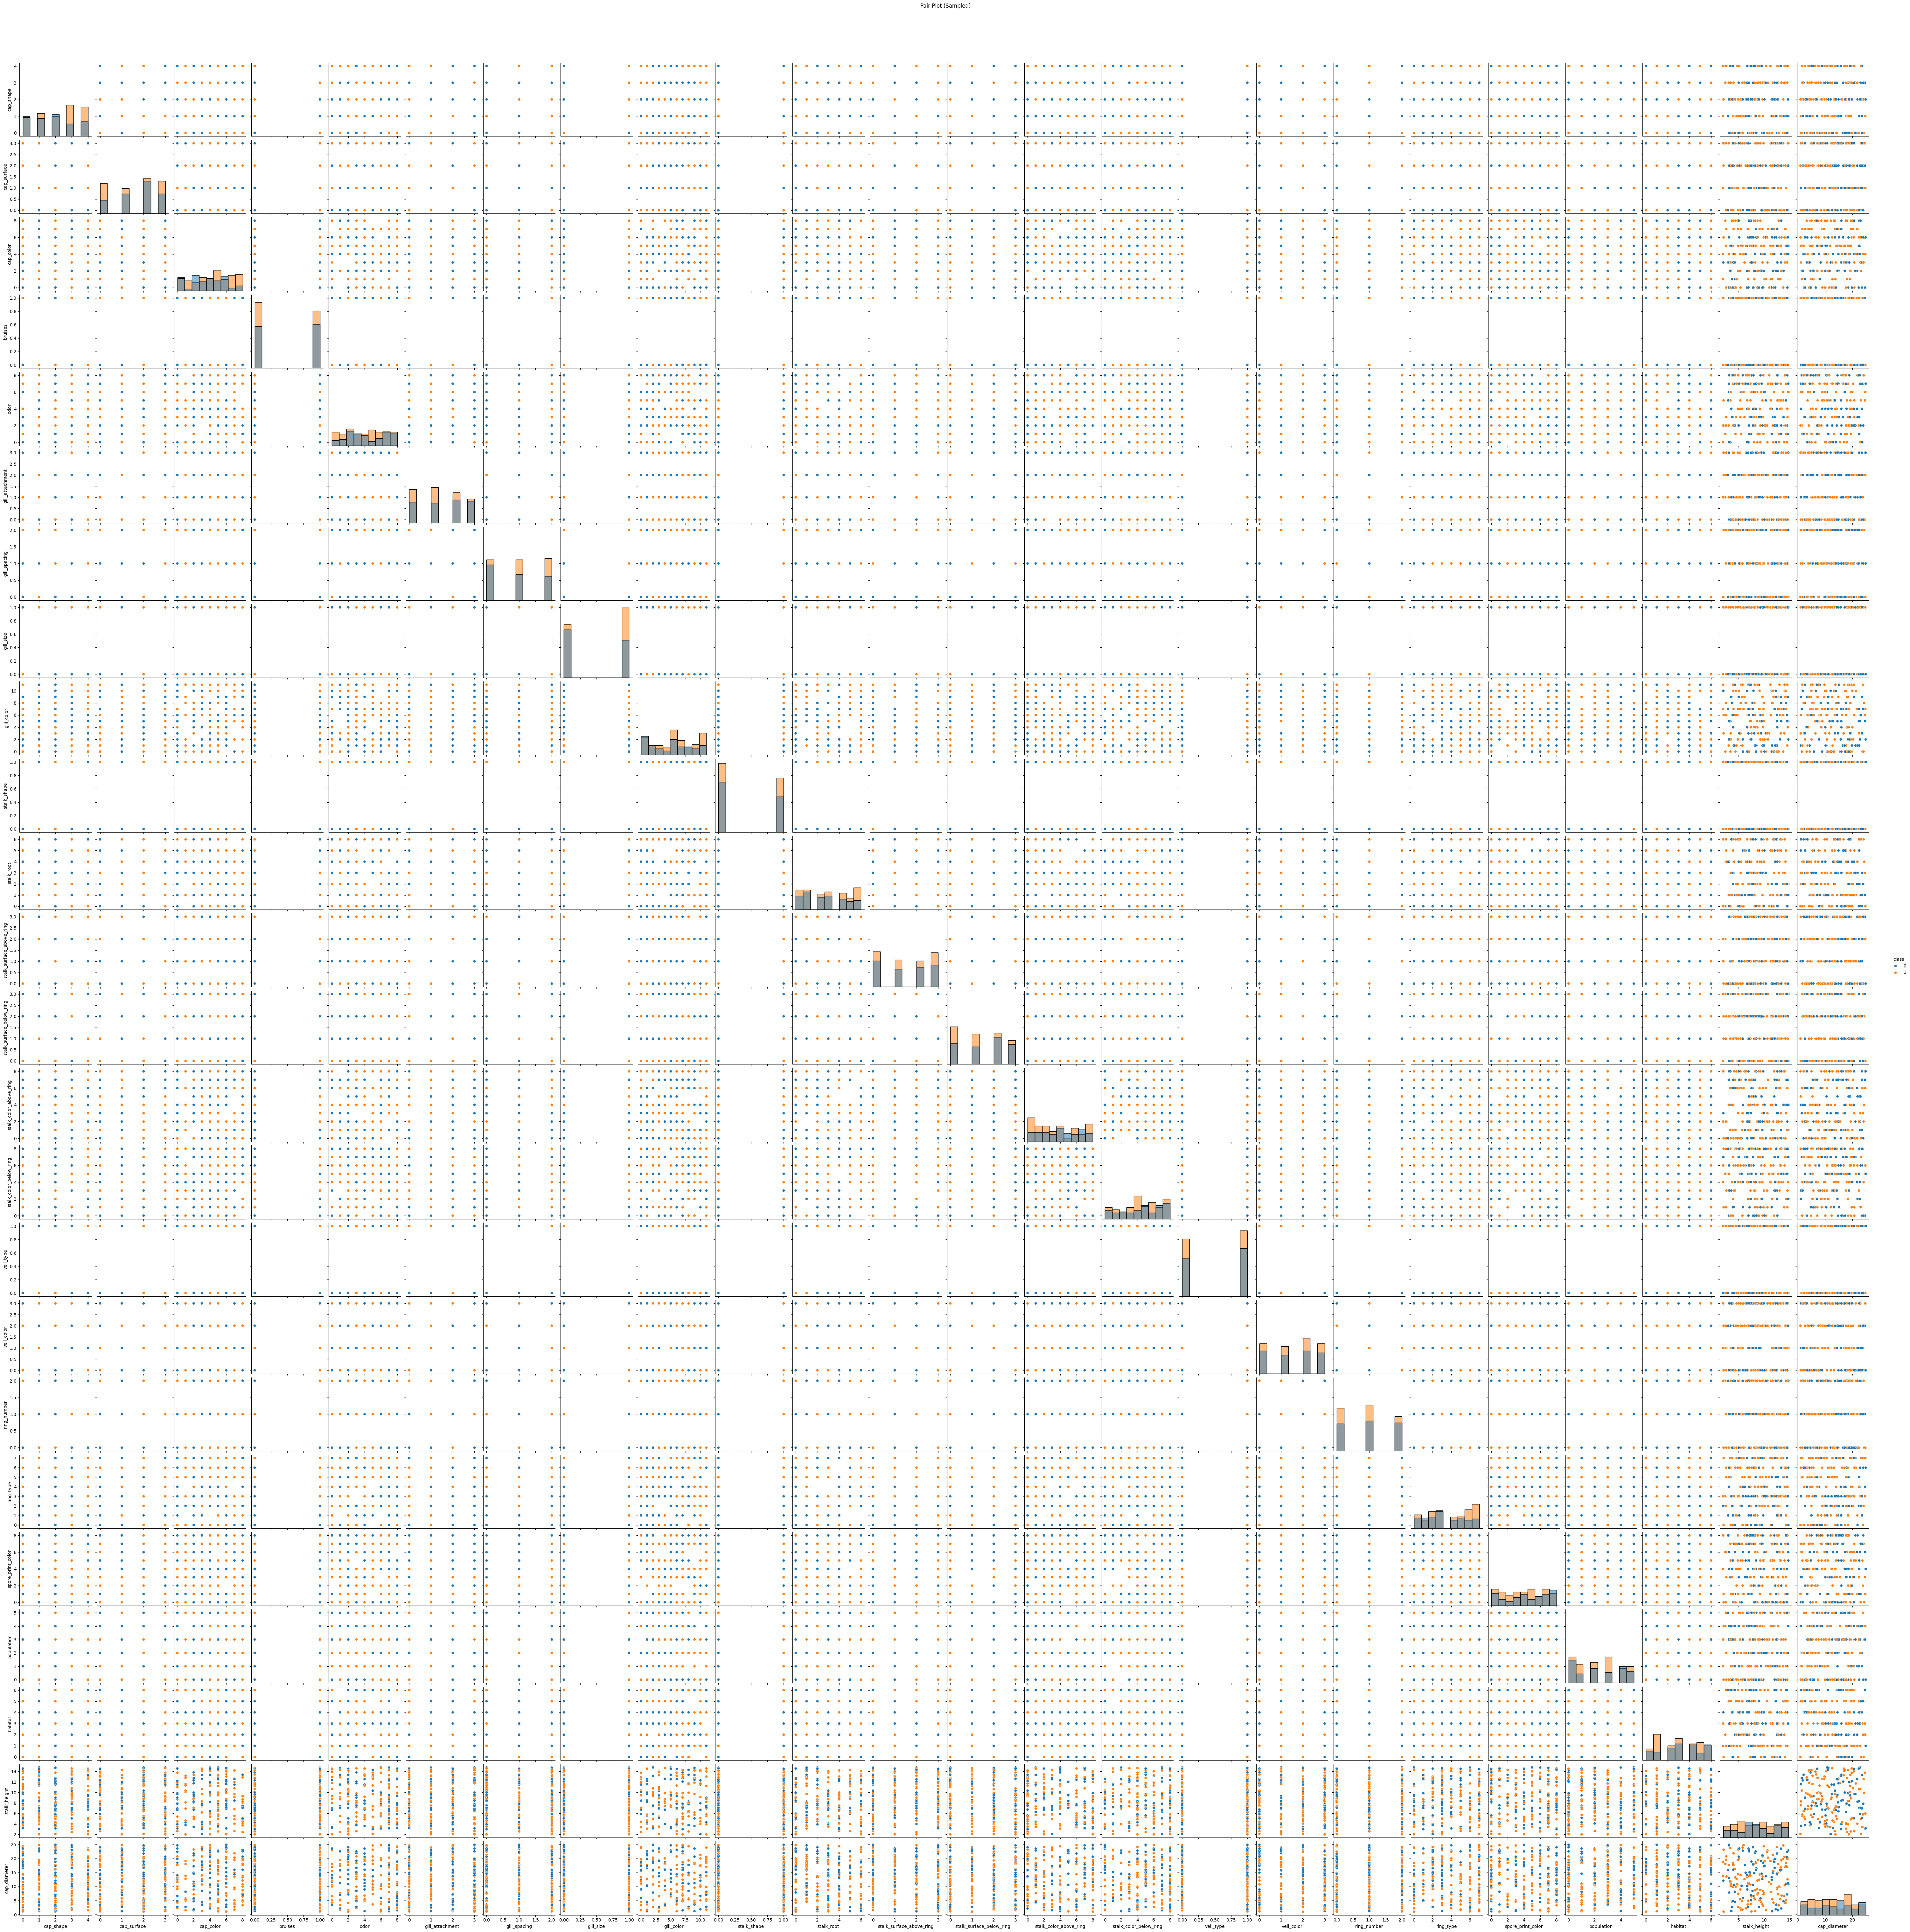

In [27]:
# Task 3: Data Visualization
# Pair plot on a subset of data for clarity
sns.pairplot(df_encoded.sample(200), hue='class', diag_kind='hist')
plt.suptitle("Pair Plot (Sampled)", y=1.02)
plt.show()

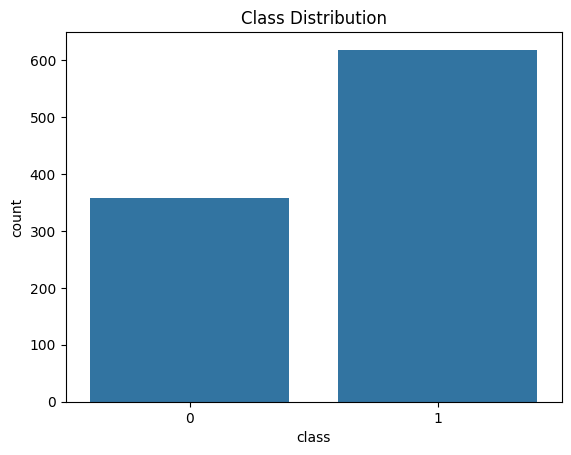

In [24]:
# Class distribution
sns.countplot(x='class', data=df_encoded)
plt.title("Class Distribution")
plt.show()


In [25]:
# Task 4: SVM Implementation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train SVM
svm = SVC(kernel='rbf', C=1.0)
svm.fit(X_train, y_train)


SVC()

In [26]:
# Predict and evaluate
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6326530612244898
Precision: 0.6326530612244898
Recall: 1.0
F1 Score: 0.775
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [27]:
print(svm.score(X_train,y_train),svm.score(X_test,y_test))

0.6333333333333333 0.6326530612244898


In [28]:

# @title HYPERPARAMETER TUNNING
parameters={'C':[0.1,1,10],
            'kernel':['linear','rbf','poly']}


In [29]:
for C in parameters['C']:
  for kernel in parameters['kernel']:
    model=SVC(C=C,kernel=kernel,random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

In [30]:
print(f"kernel:{kernel},C:{C}")


kernel:poly,C:10


In [31]:
accuracy_score(y_test,y_pred)

0.5612244897959183

In [ ]:
# SVM can effectively classify mushrooms with proper tuning, especially in safety-critical applications like identifying poisonous species.

**Strength and Weakness**:

SVM can handle high dimensional spaces effectively and efficiently which is useful for dataset with large no of features.

Weakness- svm are sensitive to the chocies of hyperparameters like kernel , c , gamma values.

SVM does not perform well with noisy data.

**Real World Application-**

Choosing the right kernel is very crucial.

SVM require significant computional resources, especially for large dataset.

One of the advantages of svm is its robust nature and avoiding over fitting.

In [ ]:
## Done